# **Tugas Kelompok 7 Praktikum Data Mining Modul 3**

### 121450074    Aisyah Tiara Pratiwi
### 121450083    Jelli Kurnilia
### 121450089    Silvina Rizqy Nur Auliya
### 121450107    Natanael Oktavianus Partahan S.
### 121450143    Rafi Fadhlillah

# **Dataset Milk Quality**

## 1) Linear Discriminant Analysis using the LDA implementation in scikit-learn.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Mengimpor library pandas dan membaca file CSV 'milknew.csv', dengan kolom pertama (index) sebagai indeks data
milk_df = pd.read_csv('/content/drive/MyDrive/PrakDamin/milknew.csv', index_col=0)

# Mengambil kolom 'Grade' dari dataframe dan menyimpannya dalam variabel 'y'
y = milk_df.pop('Grade').values

# Mengambil semua kolom (atribut) dari dataframe sebagai data mentah (X_raw)
X_raw = milk_df.values

# Memisahkan data menjadi data pelatihan (train) dan data pengujian (test) menggunakan train_test_split
# dengan pembagian data pengujian sebesar 1/2 (test_size=1/2) dan random_state=1 untuk reproduktibilitas
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y, random_state=1, test_size=1/2)

# Menggunakan StandardScaler() dari scikit-learn untuk melakukan preprocessing data pada data pelatihan (X_train) dan data pengujian (X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)

# Mengambil nama fitur (atribut) dari dataframe sebagai daftar 'feature_names'
feature_names = milk_df.columns

# Menampilkan bentuk (shape) dataframe milk_df
print(milk_df.shape)

# Menampilkan lima baris pertama dari dataframe milk_df
milk_df.head()


(1059, 6)


,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,,,,,,
6.6,35,1,0,1,0,254
6.6,36,0,1,0,1,253
8.5,70,1,1,1,1,246
9.5,34,1,1,0,1,255
6.6,37,0,0,0,0,255


In [ ]:
# Menggunakan Counter untuk menghitung kemunculan setiap nilai kategori dalam 'y' dan mengambil kunci-kuncinya
types = list(Counter(y).keys())
types

['high', 'low', 'medium']

In [ ]:
# Membuat objek LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# Melatih model LDA menggunakan data pelatihan
lda.fit(X_train, y_train)

# Menggunakan model LDA yang telah dilatih untuk mengubah data pelatihan ke dalam ruang fitur yang baru
X_tr_lda = lda.transform(X_train)

# Mengambil bentuk (shape) dari data yang telah diubah menggunakan LDA
X_tr_lda.shape

(529, 2)

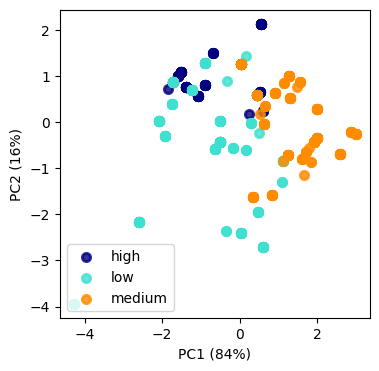

In [ ]:
# Mengimpor library Matplotlib untuk visualisasi data
import matplotlib.pyplot as plt

# Mengatur ukuran gambar plot
plt.figure(figsize=(4, 4))

# Warna-warna yang akan digunakan pada scatter plot
colors = ['navy', 'turquoise', 'darkorange']

# Ketebalan garis pada plot
lw = 2

# Loop melalui setiap kategori (jenis) dalam 'types'
for color, target_name in zip(colors, types):
    # Membuat scatter plot untuk setiap kategori dengan warna yang sesuai
    # X_tr_lda[y_train == target_name, 0] mengambil komponen pertama (PC1) untuk kategori tertentu
    # X_tr_lda[y_train == target_name, 1] mengambil komponen kedua (PC2) untuk kategori tertentu
    plt.scatter(X_tr_lda[y_train == target_name, 0], X_tr_lda[y_train == target_name, 1],
                color=color, alpha=0.8, lw=lw, label=target_name)

# Menampilkan legenda pada plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

# Menyertakan label sumbu X
plt.xlabel('PC1 (84%)')

# Menyertakan label sumbu Y
plt.ylabel('PC2 (16%)')

# Menampilkan plot
plt.show()


In [ ]:
# Melakukan prediksi menggunakan model LDA yang telah dilatih pada data pengujian (X_test)
y_pred = lda.predict(X_test)

# Menghitung akurasi prediksi dengan membandingkan hasil prediksi (y_pred) dengan nilai sebenarnya (y_test)
accuracy = accuracy_score(y_pred, y_test)

# Menampilkan nilai akurasi
print("Akurasi:", accuracy)

Akurasi: 0.7132075471698113


## 2) Metode Feature Selection using Filters

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [ ]:
# Mengimpor library pandas dan membaca file CSV 'milknew.csv'
milk_data = pd.read_csv('/content/drive/MyDrive/PrakDamin/milknew.csv')

# Menampilkan bentuk (shape) dari dataframe 'milk_data'
print(milk_data.shape)

# Menampilkan lima baris pertama dari dataframe 'milk_data'
milk_data.head()


(1059, 8)


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [ ]:
milk_data['Grade'].value_counts() # Menggunakan metode value_counts() pada kolom 'Grade' untuk menghitung jumlah masing-masing nilai kategori yang ada

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [ ]:
# Mengambil kolom 'Grade' dari dataframe 'milk_data' dan menyimpannya dalam variabel 'y'
y = milk_data.pop("Grade").values

# Mengambil semua kolom lainnya dari dataframe 'milk_data' sebagai atribut mentah (X_raw)
X_raw = milk_data.values

# Memisahkan data menjadi data pelatihan (train) dan data pengujian (test) menggunakan train_test_split
# dengan pembagian data pengujian sebesar 1/2 (test_size=1/2) dan random_state=1 untuk reproduktibilitas
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y, random_state=1, test_size=1/2)

# Menggunakan MinMaxScaler() dari scikit-learn untuk melakukan scaling (normalisasi) pada data pelatihan (X_train) dan data pengujian (X_test)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)

# Mengambil nama fitur (kolom) dari dataframe 'milk_data' sebagai daftar 'feature_names'
feature_names = milk_data.columns

# Menampilkan bentuk (shape) dari data pelatihan (X_train) dan data pengujian (X_test)
X_train.shape, X_test.shape


((529, 7), (530, 7))

In [ ]:
# Mengimpor chi2 dari library scikit-learn
from sklearn.feature_selection import chi2

# Menghitung skor Chi-Square dan p-value untuk setiap fitur dalam data pelatihan (X_train) terhadap label kelas (y_train)
chi2_score, pval = chi2(X_train, y_train)

# Mengubah nilai NaN (jika ada) dalam skor Chi-Square menjadi angka nol (0)
chi2_score = np.nan_to_num(chi2_score)

# Menampilkan skor Chi-Square untuk setiap fitur
chi2_score


array([2.20345011e-02, 2.35318207e+01, 1.46990022e+01, 6.77613582e+01,
       5.10303808e+01, 7.35828972e+01, 3.92537245e+00])

In [ ]:
# Menghitung skor Information Gain (i-scores) untuk setiap fitur dalam data pelatihan (X_train) terhadap label kelas (y_train)
i_scores = mutual_info_classif(X_train, y_train)

# Menampilkan skor Information Gain untuk setiap fitur
i_scores

array([0.56739543, 0.36726069, 0.05282126, 0.06520173, 0.18921897,
       0.16645131, 0.21071352])

In [ ]:
# Membuat dataframe 'dfmilk' dengan kolom 'Mutual Info.' (i-scores), 'Chi Square' (chi2_score), dan 'Feature' (nama fitur)
dfmilk = pd.DataFrame({'Mutual Info.': i_scores, 'Chi Square': chi2_score, 'Feature': feature_names})

# Mengatur kolom 'Feature' sebagai indeks (index) dalam dataframe 'dfmilk'
dfmilk.set_index('Feature', inplace=True)

# Mengurutkan dataframe 'dfmilk' berdasarkan skor Mutual Information secara menurun (descending)
dfmilk.sort_values('Mutual Info.', inplace=True, ascending=False)

# Menampilkan dataframe 'dfmilk'
dfmilk


,Mutual Info.,Chi Square
Feature,,
pH,0.567395,0.022035
Temprature,0.367261,23.531821
Colour,0.210714,3.925372
Fat,0.189219,51.030381
Turbidity,0.166451,73.582897
Odor,0.065202,67.761358
Taste,0.052821,14.699002


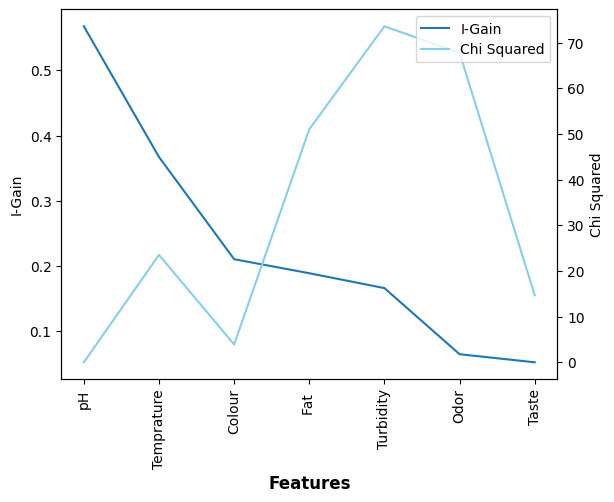

In [ ]:
# Membuat sebuah gambar dan sumbu tunggal
fig, ax = plt.subplots()
rr = range(0, len(feature_names))
# Membuat sumbu kedua (twinx) yang berbagi sumbu X dengan sumbu utama
ax2 = ax.twinx()

# Membuat plot garis untuk skor Mutual Information (I-Gain) pada sumbu utama (ax)
ax.plot(dfmilk.index, dfmilk["Mutual Info."], label='I-Gain')

# Membuat plot garis untuk skor Chi-Square pada sumbu kedua (ax2)
ax2.plot(dfmilk.index, dfmilk["Chi Square"], color="skyblue", label='Chi Squared')

# Menetapkan label sumbu X berdasarkan nama fitur (feature names) dengan rotasi 90 derajat untuk memudahkan pembacaan
ax.set_xticks(rr)
ax.set_xticklabels(list(dfmilk.index), rotation=90)

# Menetapkan label sumbu X, sumbu Y untuk sumbu utama (ax)
ax.set_xlabel('Features', fontsize=12, fontweight="bold")
ax.set_ylabel('I-Gain')

# Menetapkan label sumbu Y untuk sumbu kedua (ax2)
ax2.set_ylabel('Chi Squared')

# Menambahkan legenda ke gambar dengan posisi di sudut kanan atas (upper right)
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)

# Menampilkan plot
plt.show()

In [ ]:
from scipy import stats
stats.spearmanr(chi2_score, i_scores) # Menghitung korelasi Spearman antara skor Chi-Square dan skor Information Gain

SignificanceResult(statistic=-0.5357142857142858, pvalue=0.21521745567801273)

## 3) Metode Embedded (D-Tree)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
# Membaca dataset milknew dari file CSV dengan indeks kolom pertama (index_col = 0)
milk_df = pd.read_csv('/content/drive/MyDrive/PrakDamin/milknew.csv', index_col=0)

# Mengambil nama-nama fitur dari dataset
feature_names = milk_df.columns

# Menampilkan dimensi dataset (jumlah baris, jumlah kolom) menggunakan .shape
print(milk_df.shape)

# Menampilkan lima baris pertama dari dataset menggunakan .head()
milk_df.head()


(1059, 7)


,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
pH,,,,,,,
6.6,35,1,0,1,0,254,high
6.6,36,0,1,0,1,253,high
8.5,70,1,1,1,1,246,low
9.5,34,1,1,0,1,255,low
6.6,37,0,0,0,0,255,medium


In [ ]:
milk_df['Grade'].value_counts() #menghitung nilai yang terdapat dalam atribut Grade

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [ ]:
# Mengambil kolom 'Grade' dari dataset sebagai label (y)
y = milk_df.pop('Grade').values

# Mengambil fitur-fitur lainnya sebagai data fitur (X)
X = milk_df.values

# Memecah dataset menjadi data pelatihan (X_train dan y_train) dan data pengujian (X_test dan y_test)
# Dalam hal ini, kita menggunakan 50% data sebagai data pengujian dengan test_size=1/2
# random_state=1 digunakan untuk mereproduksi hasil yang sama jika kode ini dijalankan lagi
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=1/2)

# Mengambil nama-nama fitur dari dataset yang tersisa (setelah kolom 'Grade' dihapus)
feature_names = milk_df.columns

# Menampilkan bentuk (jumlah baris dan kolom) dari data pelatihan (X_train) dan data pengujian (X_test)
X_train.shape, X_test.shape

((529, 6), (530, 6))

In [ ]:
# Membuat model Decision Tree dengan kriteria pemilihan fitur 'entropy'
ftree = DecisionTreeClassifier(criterion='entropy')

# Melatih model Decision Tree menggunakan data pelatihan (X_train dan y_train)
ftree = ftree.fit(X_train, y_train)

# Menggunakan model yang telah dilatih untuk membuat prediksi pada data pengujian (X_test)
y_pred = ftree.predict(X_test)

# Menghitung akurasi model dengan membandingkan hasil prediksi (y_pred) dengan nilai sebenarnya (y_test)
acc = accuracy_score(y_pred, y_test)

# Mencetak akurasi model pada data pengujian
print("Test set accuracy %4.2f" % (acc))

Test set accuracy 0.90


[Text(0.42592592592592593, 0.9545454545454546, 'Temprature <= 47.5\n529\n[130, 208, 191]\nmedium'),
 Text(0.3888888888888889, 0.8636363636363636, 'Fat  <= 0.5\n429\n[130, 108, 191]\nhigh'),
 Text(0.14814814814814814, 0.7727272727272727, 'Taste <= 0.5\n146\n[1, 21, 124]\nhigh'),
 Text(0.07407407407407407, 0.6818181818181818, 'Odor <= 0.5\n94\n[1, 0, 93]\nhigh'),
 Text(0.037037037037037035, 0.5909090909090909, '82\n[0, 0, 82]\nhigh'),
 Text(0.1111111111111111, 0.5909090909090909, 'Temprature <= 40.5\n12\n[1, 0, 11]\nhigh'),
 Text(0.07407407407407407, 0.5, '1\n[1, 0, 0]\nlow'),
 Text(0.14814814814814814, 0.5, '11\n[0, 0, 11]\nhigh'),
 Text(0.2222222222222222, 0.6818181818181818, 'Temprature <= 36.0\n52\n[0, 21, 31]\nhigh'),
 Text(0.18518518518518517, 0.5909090909090909, '12\n[0, 12, 0]\nmedium'),
 Text(0.25925925925925924, 0.5909090909090909, 'Colour <= 252.5\n40\n[0, 9, 31]\nhigh'),
 Text(0.2222222222222222, 0.5, '17\n[0, 0, 17]\nhigh'),
 Text(0.2962962962962963, 0.5, 'Temprature <= 39.0

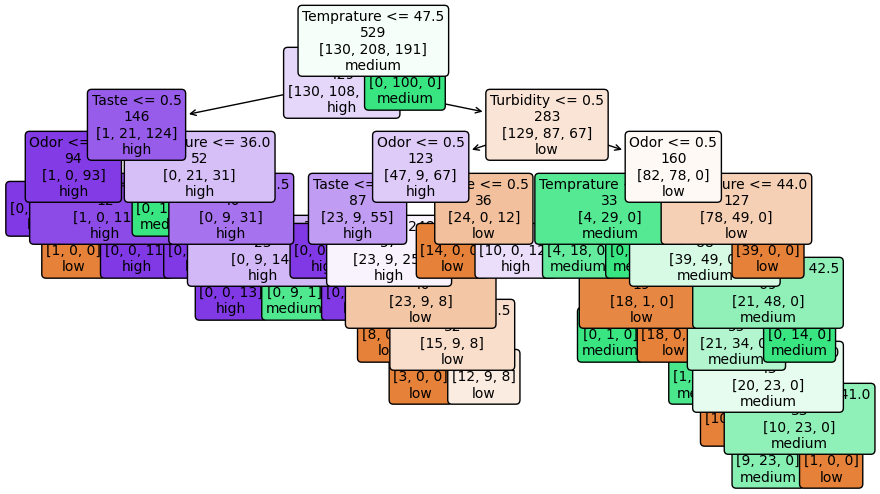

In [ ]:
# Mengatur ukuran gambar yang akan digambar
plt.figure(figsize=(11,6))

# Menggambar pohon keputusan menggunakan fungsi plot_tree dari library scikit-learn
tree.plot_tree(ftree, fontsize = 10, feature_names=feature_names,
                      class_names=['low', 'medium', 'high'],
                      label ='none', filled=True, impurity = False,
               rounded=True)

In [ ]:
# Mendapatkan nilai penting fitur dari model Decision Tree
fi = ftree.feature_importances_

# Menggunakan loop for untuk mencetak nilai penting fitur dan nama fitur yang sesuai
for fi_val, f_name in zip(fi, feature_names):
    print(" %4.2f %s" % (fi_val, f_name))


 0.42 Temprature
 0.11 Taste
 0.05 Odor
 0.19 Fat 
 0.16 Turbidity
 0.06 Colour


In [ ]:
ftree.get_n_leaves() # menampilkan jumlah leaves

25

In [ ]:
# Membuat model Decision Tree dengan kriteria pemilihan fitur 'entropy' dan pembatasan pada jumlah daun maksimum (max_leaf_nodes) sebesar 3
p_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3)

# Melatih model Decision Tree menggunakan data pelatihan (X_train dan y_train)
p_tree = p_tree.fit(X_train, y_train)

# Menggunakan model yang telah dilatih untuk membuat prediksi pada data pengujian (X_test)
y_pred = p_tree.predict(X_test)

# Mengukur akurasi model dengan membandingkan hasil prediksi (y_pred) dengan nilai sebenarnya (y_test)
acc = accuracy_score(y_pred, y_test)

# Mencetak akurasi model pada data pengujian
print("Test set accuracy %4.2f" % (acc))

Test set accuracy 0.64


[Text(0.6, 0.8333333333333334, 'Temprature <= 47.5\n529\n[130, 208, 191]\nmedium'),
 Text(0.4, 0.5, 'Fat  <= 0.5\n429\n[130, 108, 191]\nhigh'),
 Text(0.2, 0.16666666666666666, '146\n[1, 21, 124]\nhigh'),
 Text(0.6, 0.16666666666666666, '283\n[129, 87, 67]\nlow'),
 Text(0.8, 0.5, '100\n[0, 100, 0]\nmedium')]

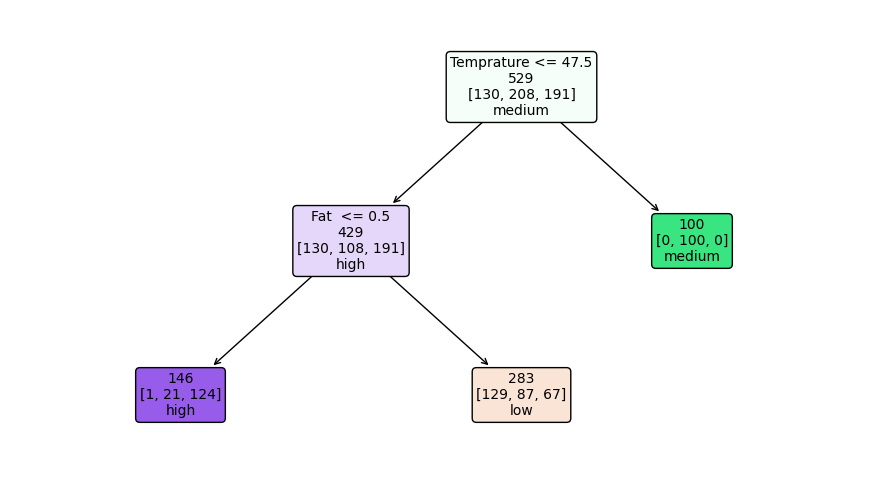

In [ ]:
plt.figure(figsize=(11,6))
tree.plot_tree(p_tree, fontsize = 10, feature_names = feature_names,
                      class_names=['low', 'medium', 'high'],
                      label = 'none', filled=True, impurity = False,
               rounded=True)

In [ ]:
# Mendapatkan nilai penting fitur dari model Decision Tree yang telah dibatasi jumlah daun maksimum
fi = p_tree.feature_importances_

# Menggunakan loop for untuk mencetak nilai penting fitur dan nama fitur yang sesuai
for fi_val, f_name in zip(fi, feature_names):
    print("%4.2f %s" % (fi_val, f_name))


0.55 Temprature
0.00 Taste
0.00 Odor
0.45 Fat 
0.00 Turbidity
0.00 Colour


# **Dataset Obesitas**

## 1) Linear Discriminant Analysis using the LDA implementation in scikit-learn.

In [ ]:
# Mengimpor library pandas dan membaca file CSV 'Obesity Classification.csv', dengan kolom pertama (index) sebagai indeks data
obesitas_df = pd.read_csv('/content/drive/MyDrive/PrakDamin/Obesity Classification.csv', index_col=0)

# Mapping nilai 'Male' menjadi 0 dan 'Female' menjadi 1
obesitas_df['Gender'] = obesitas_df['Gender'].map({'Male': 0, 'Female': 1})

# Mengambil kolom 'Label' dari dataframe dan menyimpannya dalam variabel 'y'
y = obesitas_df.pop('Label').values

# Mengambil semua kolom (atribut) dari dataframe sebagai data mentah (X_raw)
X_raw = obesitas_df.values

# Memisahkan data menjadi data pelatihan (train) dan data pengujian (test) menggunakan train_test_split
# dengan pembagian data pengujian sebesar 1/2 (test_size=1/2) dan random_state=1 untuk reproduktibilitas
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y, random_state=1, test_size=1/2)

# Menggunakan StandardScaler() dari scikit-learn untuk melakukan preprocessing data pada data pelatihan (X_train) dan data pengujian (X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)

# Mengambil nama fitur (atribut) dari dataframe sebagai daftar 'feature_names'
feature_names = obesitas_df.columns

# Menampilkan bentuk (shape) dataframe obesitas_df
print(obesitas_df.shape)

# Menampilkan lima baris pertama dari dataframe obesitas_df
obesitas_df.head()


(108, 5)


,Age,Gender,Height,Weight,BMI
ID,,,,,
1,25,0,175,80,25.3
2,30,1,160,60,22.5
3,35,0,180,90,27.3
4,40,1,150,50,20.0
5,45,0,190,100,31.2


In [ ]:
# Menggunakan Counter untuk menghitung kemunculan setiap nilai kategori dalam 'y' dan mengambil kunci-kuncinya
types = list(Counter(y).keys())
types

['Normal Weight', 'Overweight', 'Underweight', 'Obese']

In [ ]:
# Membuat objek LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# Melatih model LDA menggunakan data pelatihan
lda.fit(X_train, y_train)

# Menggunakan model LDA yang telah dilatih untuk mengubah data pelatihan ke dalam ruang fitur yang baru
X_tr_lda = lda.transform(X_train)

# Mengambil bentuk (shape) dari data yang telah diubah menggunakan LDA
X_tr_lda.shape


(54, 3)

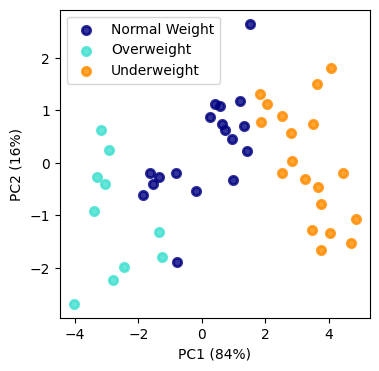

In [ ]:
# Mengimpor library Matplotlib untuk visualisasi data
import matplotlib.pyplot as plt

# Mengatur ukuran gambar plot
plt.figure(figsize=(4, 4))

# Warna-warna yang akan digunakan pada scatter plot
colors = ['navy', 'turquoise', 'darkorange']

# Ketebalan garis pada plot
lw = 2

# Loop melalui setiap kategori (jenis) dalam 'types'
for color, target_name in zip(colors, types):
    # Membuat scatter plot untuk setiap kategori dengan warna yang sesuai
    # X_tr_lda[y_train == target_name, 0] mengambil komponen pertama (PC1) untuk kategori tertentu
    # X_tr_lda[y_train == target_name, 1] mengambil komponen kedua (PC2) untuk kategori tertentu
    plt.scatter(X_tr_lda[y_train == target_name, 0], X_tr_lda[y_train == target_name, 1],
                color=color, alpha=0.8, lw=lw, label=target_name)

# Menampilkan legenda pada plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

# Menyertakan label sumbu X
plt.xlabel('PC1 (84%)')

# Menyertakan label sumbu Y
plt.ylabel('PC2 (16%)')

# Menampilkan plot
plt.show()


In [ ]:
# Melakukan prediksi menggunakan model LDA yang telah dilatih pada data pengujian (X_test)
y_pred = lda.predict(X_test)

# Menghitung akurasi prediksi dengan membandingkan hasil prediksi (y_pred) dengan nilai sebenarnya (y_test)
accuracy = accuracy_score(y_pred, y_test)

# Menampilkan nilai akurasi
print("Akurasi:", accuracy)

Akurasi: 0.8888888888888888


## 2) Feature Selection using Filters

In [ ]:
# Mengimpor library pandas dan membaca file CSV 'Obesity Classification.csv'
obs_data = pd.read_csv('/content/drive/MyDrive/PrakDamin/Obesity Classification.csv')

# Mapping nilai 'Male' menjadi 0 dan 'Female' menjadi 1
obs_data['Gender'] = obs_data['Gender'].map({'Male': 0, 'Female': 1})

# Menampilkan bentuk (shape) dari dataframe 'obs_data'
print(obs_data.shape)

# Menampilkan lima baris pertama dari dataframe 'obs_data'
obs_data.head()


(108, 7)


,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,0,175,80,25.3,Normal Weight
1,2,30,1,160,60,22.5,Normal Weight
2,3,35,0,180,90,27.3,Overweight
3,4,40,1,150,50,20.0,Underweight
4,5,45,0,190,100,31.2,Obese


In [ ]:
obs_data['Label'].value_counts() # Menggunakan metode value_counts() pada kolom 'Label' untuk menghitung jumlah masing-masing nilai kategori yang ada

Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: Label, dtype: int64

In [ ]:
# Mengambil kolom 'Label' dari dataframe 'bike_data' dan menyimpannya dalam variabel 'y'
y = obs_data.pop("Label").values

# Mengambil semua kolom lainnya dari dataframe 'obs_data' sebagai atribut mentah (X_raw)
X_raw = obs_data.values

# Memisahkan data menjadi data pelatihan (train) dan data pengujian (test) menggunakan train_test_split
# dengan pembagian data pengujian sebesar 1/2 (test_size=1/2) dan random_state=1 untuk reproduktibilitas
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y, random_state=1, test_size=1/2)

# Menggunakan MinMaxScaler() dari scikit-learn untuk melakukan scaling (normalisasi) pada data pelatihan (X_train) dan data pengujian (X_test)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)

# Mengambil nama fitur (kolom) dari dataframe 'obs_data' sebagai daftar 'feature_names'
feature_names = obs_data.columns

# Menampilkan bentuk (shape) dari data pelatihan (X_train) dan data pengujian (X_test)
X_train.shape, X_test.shape


((54, 6), (54, 6))

In [ ]:
# Mengimpor chi2 dari library scikit-learn
from sklearn.feature_selection import chi2

# Menghitung skor Chi-Square dan p-value untuk setiap fitur dalam data pelatihan (X_train) terhadap label kelas (y_train)
chi2_score, pval = chi2(X_train, y_train)

# Mengubah nilai NaN (jika ada) dalam skor Chi-Square menjadi angka nol (0)
chi2_score = np.nan_to_num(chi2_score)

# Menampilkan skor Chi-Square untuk setiap fitur
chi2_score


array([1.86745299, 2.87711449, 5.81578947, 3.08080984, 6.74021657,
       4.68195852])

In [ ]:
# Menghitung skor Information Gain (i-scores) untuk setiap fitur dalam data pelatihan (X_train) terhadap label kelas (y_train)
i_scores = mutual_info_classif(X_train, y_train)

# Menampilkan skor Information Gain untuk setiap fitur
i_scores

array([0.12653827, 0.14887806, 0.09968181, 0.30387815, 1.18016381,
       1.08452889])

In [ ]:
# Membuat dataframe 'dfobs' dengan kolom 'Mutual Info.' (i-scores), 'Chi Square' (chi2_score), dan 'Feature' (nama fitur)
dfobs = pd.DataFrame({'Mutual Info.': i_scores, 'Chi Square': chi2_score, 'Feature': feature_names})

# Mengatur kolom 'Feature' sebagai indeks (index) dalam dataframe 'df'
dfobs.set_index('Feature', inplace=True)

# Mengurutkan dataframe 'dfobs' berdasarkan skor Mutual Information secara menurun (descending)
dfobs.sort_values('Mutual Info.', inplace=True, ascending=False)

# Menampilkan dataframe 'dfobs'
dfobs


,Mutual Info.,Chi Square
Feature,,
Weight,1.180164,6.740217
BMI,1.084529,4.681959
Height,0.303878,3.080810
Age,0.148878,2.877114
ID,0.126538,1.867453
Gender,0.099682,5.815789


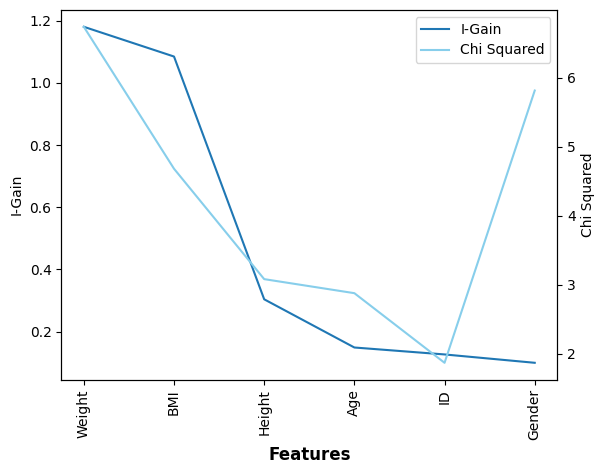

In [ ]:
# Membuat sebuah gambar dan sumbu tunggal
fig, ax = plt.subplots()
rr = range(0, len(feature_names))
# Membuat sumbu kedua (twinx) yang berbagi sumbu X dengan sumbu utama
ax2 = ax.twinx()

# Membuat plot garis untuk skor Mutual Information (I-Gain) pada sumbu utama (ax)
ax.plot(dfobs.index, dfobs["Mutual Info."], label='I-Gain')

# Membuat plot garis untuk skor Chi-Square pada sumbu kedua (ax2)
ax2.plot(dfobs.index, dfobs["Chi Square"], color="skyblue", label='Chi Squared')

# Menetapkan label sumbu X berdasarkan nama fitur (feature names) dengan rotasi 90 derajat untuk memudahkan pembacaan
ax.set_xticks(rr)
ax.set_xticklabels(list(dfobs.index), rotation=90)

# Menetapkan label sumbu X, sumbu Y untuk sumbu utama (ax)
ax.set_xlabel('Features', fontsize=12, fontweight="bold")
ax.set_ylabel('I-Gain')

# Menetapkan label sumbu Y untuk sumbu kedua (ax2)
ax2.set_ylabel('Chi Squared')

# Menambahkan legenda ke gambar dengan posisi di sudut kanan atas (upper right)
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)

# Menampilkan plot
plt.show()

In [ ]:
from scipy import stats
stats.spearmanr(chi2_score, i_scores) # Menghitung korelasi Spearman antara skor Chi-Square dan skor Information Gain

SignificanceResult(statistic=0.4285714285714286, pvalue=0.3965014577259474)

## 3) Metode Embedded (D-Tree)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
# Membaca dataset obesitas dari file CSV dengan indeks kolom pertama (index_col = 0)
obs_df = pd.read_csv('/content/drive/MyDrive/PrakDamin/Obesity Classification.csv', index_col=0)

# Mapping nilai 'Male' menjadi 0 dan 'Female' menjadi 1
obs_df['Gender'] = obs_df['Gender'].map({'Male': 0, 'Female': 1})

# Mengambil nama-nama fitur dari dataset
feature_names = obs_df.columns

# Menampilkan dimensi dataset (jumlah baris, jumlah kolom) menggunakan .shape
print(obs_df.shape)

# Menampilkan lima baris pertama dari dataset menggunakan .head()
obs_df.head()


(108, 6)


,Age,Gender,Height,Weight,BMI,Label
ID,,,,,,
1,25,0,175,80,25.3,Normal Weight
2,30,1,160,60,22.5,Normal Weight
3,35,0,180,90,27.3,Overweight
4,40,1,150,50,20.0,Underweight
5,45,0,190,100,31.2,Obese


In [ ]:
obs_df['Label'].value_counts() #menghitung nilai yang terdapat dalam atribut Label

Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: Label, dtype: int64

In [ ]:
# Mengambil kolom 'Label' dari dataset sebagai label (y)
y = obs_df.pop('Label').values

# Mengambil fitur-fitur lainnya sebagai data fitur (X)
X = obs_df.values

# Memecah dataset menjadi data pelatihan (X_train dan y_train) dan data pengujian (X_test dan y_test)
# Dalam hal ini, kita menggunakan 50% data sebagai data pengujian dengan test_size=1/2
# random_state=1 digunakan untuk mereproduksi hasil yang sama jika kode ini dijalankan lagi
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=1/2)

# Mengambil nama-nama fitur dari dataset yang tersisa (setelah kolom 'Label' dihapus)
feature_names = obs_df.columns

# Menampilkan bentuk (jumlah baris dan kolom) dari data pelatihan (X_train) dan data pengujian (X_test)
X_train.shape, X_test.shape

((54, 5), (54, 5))

In [ ]:
# Membuat model Decision Tree dengan kriteria pemilihan fitur 'entropy'
ftree = DecisionTreeClassifier(criterion='entropy')

# Melatih model Decision Tree menggunakan data pelatihan (X_train dan y_train)
ftree = ftree.fit(X_train, y_train)

# Menggunakan model yang telah dilatih untuk membuat prediksi pada data pengujian (X_test)
y_pred = ftree.predict(X_test)

# Menghitung akurasi model dengan membandingkan hasil prediksi (y_pred) dengan nilai sebenarnya (y_test)
acc = accuracy_score(y_pred, y_test)

# Mencetak akurasi model pada data pengujian
print("Test set accuracy %4.2f" % (acc))

Test set accuracy 0.98


[Text(0.4444444444444444, 0.9, 'Weight <= 52.5\n54\n[18, 7, 10, 19]\nObese'),
 Text(0.3333333333333333, 0.7, '19\n[0, 0, 0, 19]\nObese'),
 Text(0.5555555555555556, 0.7, 'BMI <= 25.7\n35\n[18, 7, 10, 0]\nUnderweight'),
 Text(0.3333333333333333, 0.5, 'Height <= 135.0\n20\n[18, 0, 2, 0]\nUnderweight'),
 Text(0.2222222222222222, 0.3, 'BMI <= 24.2\n4\n[2, 0, 2, 0]\nUnderweight'),
 Text(0.1111111111111111, 0.1, '2\n[2, 0, 0, 0]\nUnderweight'),
 Text(0.3333333333333333, 0.1, '2\n[0, 0, 2, 0]\nOverweight'),
 Text(0.4444444444444444, 0.3, '16\n[16, 0, 0, 0]\nUnderweight'),
 Text(0.7777777777777778, 0.5, 'Weight <= 97.5\n15\n[0, 7, 8, 0]\nOverweight'),
 Text(0.6666666666666666, 0.3, '8\n[0, 0, 8, 0]\nOverweight'),
 Text(0.8888888888888888, 0.3, '7\n[0, 7, 0, 0]\nNormal Weight')]

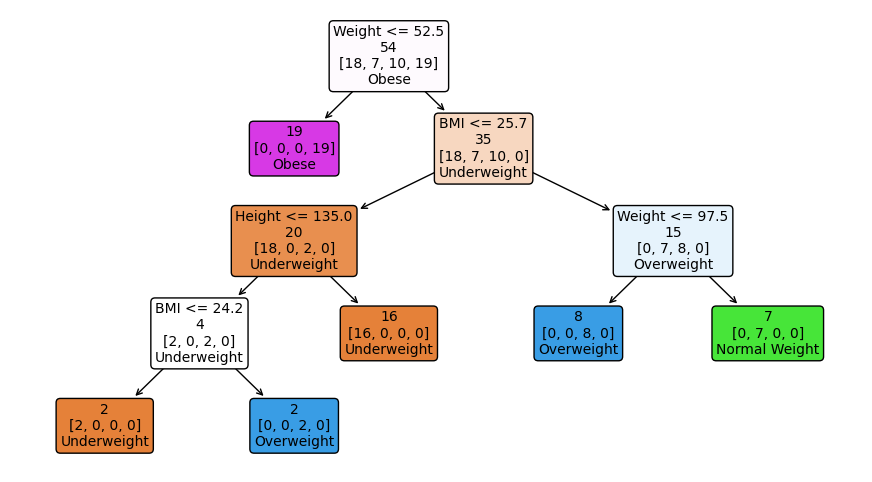

In [ ]:
# Mengatur ukuran gambar yang akan digambar
plt.figure(figsize=(11,6))

# Menggambar pohon keputusan menggunakan fungsi plot_tree dari library scikit-learn
tree.plot_tree(ftree, fontsize = 10, feature_names=feature_names,
                      class_names=['Underweight', 'Normal Weight', 'Overweight', 'Obese'],
                      label ='none', filled=True, impurity = False,
               rounded=True)

In [ ]:
# Mendapatkan nilai penting fitur dari model Decision Tree
fi = ftree.feature_importances_

# Menggunakan loop for untuk mencetak nilai penting fitur dan nama fitur yang sesuai
for fi_val, f_name in zip(fi, feature_names):
    print(" %4.2f %s" % (fi_val, f_name))


 0.00 Age
 0.00 Gender
 0.05 Height
 0.64 Weight
 0.31 BMI


In [ ]:
ftree.get_n_leaves() # menampilkan jumlah leaves

6

In [ ]:
# Membuat model Decision Tree dengan kriteria pemilihan fitur 'entropy' dan pembatasan pada jumlah daun maksimum (max_leaf_nodes) sebesar 3
p_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3)

# Melatih model Decision Tree menggunakan data pelatihan (X_train dan y_train)
p_tree = p_tree.fit(X_train, y_train)

# Menggunakan model yang telah dilatih untuk membuat prediksi pada data pengujian (X_test)
y_pred = p_tree.predict(X_test)

# Mengukur akurasi model dengan membandingkan hasil prediksi (y_pred) dengan nilai sebenarnya (y_test)
acc = accuracy_score(y_pred, y_test)

# Mencetak akurasi model pada data pengujian
print("Test set accuracy %4.2f" % (acc))

Test set accuracy 0.87


[Text(0.4, 0.8333333333333334, 'BMI <= 20.6\n54\n[18, 7, 10, 19]\nObese'),
 Text(0.2, 0.5, '19\n[0, 0, 0, 19]\nObese'),
 Text(0.6, 0.5, 'Weight <= 82.5\n35\n[18, 7, 10, 0]\nUnderweight'),
 Text(0.4, 0.16666666666666666, '20\n[18, 0, 2, 0]\nUnderweight'),
 Text(0.8, 0.16666666666666666, '15\n[0, 7, 8, 0]\nOverweight')]

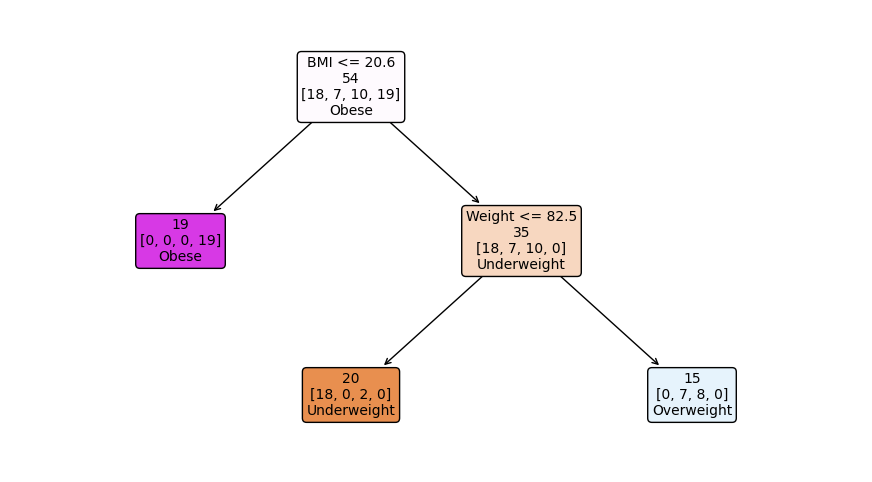

In [ ]:
plt.figure(figsize=(11,6))
tree.plot_tree(p_tree, fontsize = 10, feature_names = feature_names,
                      class_names=['Underweight', 'Normal Weight', 'Overweight', 'Obese'],
                      label = 'none', filled=True, impurity = False,
               rounded=True)

In [ ]:
# Mendapatkan nilai penting fitur dari model Decision Tree yang telah dibatasi jumlah daun maksimum
fi = p_tree.feature_importances_

# Menggunakan loop for untuk mencetak nilai penting fitur dan nama fitur yang sesuai
for fi_val, f_name in zip(fi, feature_names):
    print("%4.2f %s" % (fi_val, f_name))


0.00 Age
0.00 Gender
0.00 Height
0.35 Weight
0.65 BMI
